<a href="https://colab.research.google.com/github/isdeniz/paper-24/blob/main/nlbse22_llama3_8b_case8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

pd.set_option('display.max_colwidth', None)

Retrieve NLBSE'22 test set - detailed version

In [2]:
test = pd.read_csv('/content/drive/My Drive/nlbse22/case1/test_clean_concat_200_detailed_data.csv')

In [3]:
test.shape

(80518, 7)

In [4]:
test.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels
0,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found",error keyerror key tiff.sampleformat_int 0x0008 not found,"One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,enhancement,1
1,Add database backup to dropbox,add database backup to dropbox,NaN,NaN,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,enhancement,1
2,Add a button/method to open the Source or Output folders,add a button method to open the source or output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,enhancement,1
3,Processes are being started twice,processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,bug,0
4,Cannot add hp to wall,cannot add hp to wall,NaN,NaN,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,bug,0


Retrieve predictions of the RoBERTa model for the NLBSE'22 test set

In [5]:
roberta_preds = pd.read_pickle('/content/drive/My Drive/nlbse22/case1/nlbse22_test_roberta_preds.pkl')
print(roberta_preds.shape)

(80518, 4)


In [6]:
roberta_preds.head()

,text,labels,actual_labels,prediction
0,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,1,1,0
1,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,1,1,1
2,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,1,1,1
3,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,0,0,0
4,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,0,0,0


In [7]:
mapping = {0: 'bug', 1: 'enhancement', 2: 'question'}

In [8]:
roberta_preds['prediction'] = roberta_preds['prediction'].map(mapping)

In [9]:
roberta_preds['actual_labels'] = roberta_preds['actual_labels'].map(mapping)

In [10]:
actual_labels = roberta_preds['actual_labels']
predicted_labels = roberta_preds['prediction']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

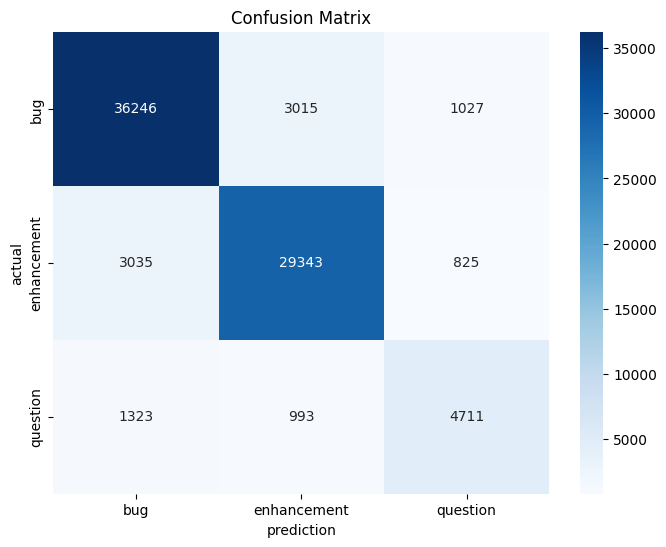

In [11]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.893     0.900     0.896     40288
 enhancement      0.880     0.884     0.882     33203
    question      0.718     0.670     0.693      7027

    accuracy                          0.873     80518
   macro avg      0.830     0.818     0.824     80518
weighted avg      0.872     0.873     0.873     80518



In [13]:
test['roberta_prediction'] = roberta_preds['prediction']
test.tail()

original_issue_title  \
80513                         No Gap Fill with bucket size bigger then inserted interval of data   
80514                     desktop: Support sandbox with webkit_web_context_set_sandbox_enabled()   
80515                                                                     Can't install watchman   
80516  [Enhancement] Optional top section of Kirby page contents, visually blending with toolbar   
80517                                                   Script manage.sh wont work after install   

                                                                           preprocessed_title  \
80513                      no gap fill with bucket size bigger then inserted interval of data   
80514                     desktop support sandbox with webkit_web_context_set_sandbox_enabled   
80515                                                                  can't install watchman   
80516  enhancement optional top section of kirby page contents visually blending with toolbar   
80517                                                script manage.sh wont work after install   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [14]:
test.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,roberta_prediction
0,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found",error keyerror key tiff.sampleformat_int 0x0008 not found,"One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,enhancement,1,bug
1,Add database backup to dropbox,add database backup to dropbox,NaN,NaN,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,enhancement,1,enhancement
2,Add a button/method to open the Source or Output folders,add a button method to open the source or output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,enhancement,1,enhancement
3,Processes are being started twice,processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,bug,0,bug
4,Cannot add hp to wall,cannot add hp to wall,NaN,NaN,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,bug,0,bug


In [15]:
test.shape

(80518, 8)

Train Test Split for LLAMA3 Experiments

In [16]:
_, llama3_sample = train_test_split(
    test,
    test_size = 5000,
    stratify = test['issue_label'],
    random_state = 42
)

In [17]:
llama3_sample.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,roberta_prediction
41086,Целевой дизайн,NaN,NaN,NaN,time 2021-02-04T20:52:43Z author OWNER repo therealmonE/fire-res title body nan,enhancement,1,enhancement
60093,"As a guest user, I can see only the “Sign in” and “Sign out” pages.",as a guest user i can see only the sign in and sign out pages.,NaN,NaN,time 2021-04-16T11:32:08Z author OWNER repo marijanbrvar/stay-in-touch title as a guest user i can see only the sign in and sign out pages. body nan,enhancement,1,enhancement
71069,[docker] Images with extraneous Ray commits might sometimes be getting tagged nightly,docker images with extraneous ray commits might sometimes be getting tagged nightly,"<!--Please include [tune], [rllib], [autoscaler] etc. in the issue title if relevant-->\r\n\r\n### What is the problem?\r\n\r\nLooks like images with non-merged PR commits occasionally might sometimes get tagged nightly.\r\nI recently pulled a nightly image that had this ray commit in it https://github.com/ray-project/ray/commit/f4b2ae7408c78d8fabf8569e8f458083b1d752ab\r\n\r\n*Ray version and other system information (Python version, TensorFlow version, OS):*\r\n\r\n### Reproduction (REQUIRED)\r\nPlease provide a short code snippet (less than 50 lines if possible) that can be copy-pasted to reproduce the issue. The snippet should have **no external library dependencies** (i.e., use fake or mock data / environments):\r\n\r\nIf the code snippet cannot be run by itself, the issue will be closed with ""needs-repro-script"".\r\n\r\n- [ ] I have verified my script runs in a clean environment and reproduces the issue.\r\n- [ ] I have verified the issue also occurs with the [latest wheels](https://docs.ray.io/en/master/installation.html).\r\n",please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en master installation.html .,time 2021-03-19T03:46:33Z author CONTRIBUTOR repo ray-project/ray title docker images with extraneous ray commits might sometimes be getting tagged nightly body please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en master installation.html .,bug,0,bug
66630,Basket deletion from database.,basket deletion from database.,At the moment the basket is working just fine but in the future when will add basket tota

In [18]:
llama3_sample.shape

(5000, 8)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
actual_labels = llama3_sample['issue_label']
predicted_labels = llama3_sample['roberta_prediction']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

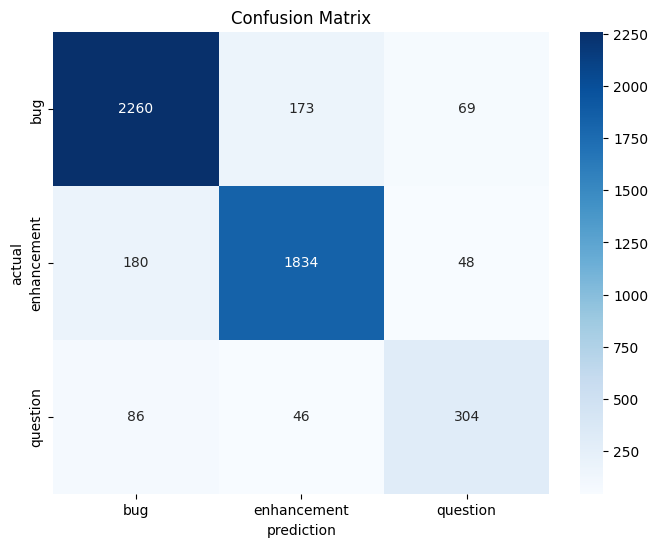

In [67]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [68]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.895     0.903     0.899      2502
 enhancement      0.893     0.889     0.891      2062
    question      0.722     0.697     0.709       436

    accuracy                          0.880      5000
   macro avg      0.837     0.830     0.833      5000
weighted avg      0.879     0.880     0.879      5000



In [19]:
llama3_sample.to_csv('/content/drive/My Drive/nlbse22/case1/llama3_test_sample.csv')
llama3_sample.to_pickle('/content/drive/My Drive/nlbse22/case1/llama3_test_sample.pkl')

Llama 3 8B

In [20]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [21]:
!pip install langchain
!pip install langchain-core
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.7/409.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.21
    Uninstalling langchain-core-0.3.21:
      Successfully uninstalled langchain-core-0.3.21
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.9
    Uninstalling langchain-0.3.9:
      Successfully uninstalled langchain-0.3.9


In [22]:
!pip install -U langchain-ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.0
    Uninstalling httpx-0.28.0:
      Successfully uninstalled httpx-0.28.0


In [23]:
from langchain_ollama import OllamaLLM
llm = OllamaLLM(model = "llama3", num_ctx=8192, temperature=0)

In [24]:
llm

OllamaLLM(model='llama3', num_ctx=8192, temperature=0.0)

In [25]:
pip install tqdm

In [26]:
test_sample = pd.read_pickle('/content/drive/My Drive/nlbse22/case1/llama3_test_sample.pkl')
print('Number of issues: ', test_sample.shape)

Number of issues:  (5000, 8)


In [27]:
test_sample.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,roberta_prediction
41086,Целевой дизайн,NaN,NaN,NaN,time 2021-02-04T20:52:43Z author OWNER repo therealmonE/fire-res title body nan,enhancement,1,enhancement
60093,"As a guest user, I can see only the “Sign in” and “Sign out” pages.",as a guest user i can see only the sign in and sign out pages.,NaN,NaN,time 2021-04-16T11:32:08Z author OWNER repo marijanbrvar/stay-in-touch title as a guest user i can see only the sign in and sign out pages. body nan,enhancement,1,enhancement
71069,[docker] Images with extraneous Ray commits might sometimes be getting tagged nightly,docker images with extraneous ray commits might sometimes be getting tagged nightly,"<!--Please include [tune], [rllib], [autoscaler] etc. in the issue title if relevant-->\r\n\r\n### What is the problem?\r\n\r\nLooks like images with non-merged PR commits occasionally might sometimes get tagged nightly.\r\nI recently pulled a nightly image that had this ray commit in it https://github.com/ray-project/ray/commit/f4b2ae7408c78d8fabf8569e8f458083b1d752ab\r\n\r\n*Ray version and other system information (Python version, TensorFlow version, OS):*\r\n\r\n### Reproduction (REQUIRED)\r\nPlease provide a short code snippet (less than 50 lines if possible) that can be copy-pasted to reproduce the issue. The snippet should have **no external library dependencies** (i.e., use fake or mock data / environments):\r\n\r\nIf the code snippet cannot be run by itself, the issue will be closed with ""needs-repro-script"".\r\n\r\n- [ ] I have verified my script runs in a clean environment and reproduces the issue.\r\n- [ ] I have verified the issue also occurs with the [latest wheels](https://docs.ray.io/en/master/installation.html).\r\n",please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en master installation.html .,time 2021-03-19T03:46:33Z author CONTRIBUTOR repo ray-project/ray title docker images with extraneous ray commits might sometimes be getting tagged nightly body please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en master installation.html .,bug,0,bug
66630,Basket deletion from database.,basket deletion from database.,At the moment the basket is working just fine but in the future when will add basket tota

In [28]:
test_sample = test_sample.reset_index(drop = False)

In [29]:
test_sample.head()

,index,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,roberta_prediction
0,41086,Целевой дизайн,NaN,NaN,NaN,time 2021-02-04T20:52:43Z author OWNER repo therealmonE/fire-res title body nan,enhancement,1,enhancement
1,60093,"As a guest user, I can see only the “Sign in” and “Sign out” pages.",as a guest user i can see only the sign in and sign out pages.,NaN,NaN,time 2021-04-16T11:32:08Z author OWNER repo marijanbrvar/stay-in-touch title as a guest user i can see only the sign in and sign out pages. body nan,enhancement,1,enhancement
2,71069,[docker] Images with extraneous Ray commits might sometimes be getting tagged nightly,docker images with extraneous ray commits might sometimes be getting tagged nightly,"<!--Please include [tune], [rllib], [autoscaler] etc. in the issue title if relevant-->\r\n\r\n### What is the problem?\r\n\r\nLooks like images with non-merged PR commits occasionally might sometimes get tagged nightly.\r\nI recently pulled a nightly image that had this ray commit in it https://github.com/ray-project/ray/commit/f4b2ae7408c78d8fabf8569e8f458083b1d752ab\r\n\r\n*Ray version and other system information (Python version, TensorFlow version, OS):*\r\n\r\n### Reproduction (REQUIRED)\r\nPlease provide a short code snippet (less than 50 lines if possible) that can be copy-pasted to reproduce the issue. The snippet should have **no external library dependencies** (i.e., use fake or mock data / environments):\r\n\r\nIf the code snippet cannot be run by itself, the issue will be closed with ""needs-repro-script"".\r\n\r\n- [ ] I have verified my script runs in a clean environment and reproduces the issue.\r\n- [ ] I have verified the issue also occurs with the [latest wheels](https://docs.ray.io/en/master/installation.html).\r\n",please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en master installation.html .,time 2021-03-19T03:46:33Z author CONTRIBUTOR repo ray-project/ray title docker images with extraneous ray commits might sometimes be getting tagged nightly body please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en master installation.html .,bug,0,bug
3,66630,Basket deletion from database.,basket deletion from database.,At the moment the basket is working just fine but in the future when will a

In [30]:
s = test_sample.shape[0] // 1000
print(s)

5


In [31]:
x = 1
i = 0

while x < (s+1):
    i = (x - 1) * 1000
    n = x * 1000
    with tqdm(total = (n - i), ncols = 100) as pbar:
        while i < n:
            try:
                test_sample.loc[i,'llama3_8b_prediction'] = llm.invoke(f"""Classify the following issue as "bug", "enhancement", "question" or "other" and rate your classification confidence and issue understandability in range 0 - 100. Your answer should only include:
Classification: your classification answer
Prediction Confidence: your level of confidence
Issue Understandability: level of understandability
Do not provide any explanation.
Issue Title: {test_sample.loc[i,'original_issue_title']}
Issue Body: {test_sample.loc[i,'original_issue_body']}
""")
                pbar.update(1)
                i = i + 1
            except:
                print('exception')
                continue
    test_sample.to_pickle('/content/drive/My Drive/nlbse22/case1/nlbse22_test_sample_llama3_8b_preds.pkl')
    print(f'Categorization of {n} issues is complete')
    x = x + 1

100%|███████████████████████████████████████████████████████████| 1000/1000 [04:56<00:00,  3.37it/s]


Categorization of 1000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [05:16<00:00,  3.16it/s]


Categorization of 2000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:43<00:00,  3.53it/s]


Categorization of 3000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:41<00:00,  3.55it/s]


Categorization of 4000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [04:31<00:00,  3.68it/s]

Categorization of 5000 issues is complete


In [32]:
print(x)

6


In [33]:
test_sample.tail()

,index,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,roberta_prediction,llama3_8b_prediction
4995,2431,"After packaging, the download has no response 。",after packaging the download has no response,![image](https://user-images.githubusercontent.com/18651522/106985725-e89f8d00-67a4-11eb-9719-0690fa2279fc.png)\r\n![image](https://user-images.githubusercontent.com/18651522/106985779-053bc500-67a5-11eb-8585-611e4e8e4e77.png)\r\n,image https user images.githubusercontent.com 18651522 106985725 e89f8d00 67a4 11eb 9719 0690fa2279fc.png image https user images.githubusercontent.com 18651522 106985779 053bc500 67a5 11eb 8585 611e4e8e4e77.png,time 2021-02-05T03:26:55Z author NONE repo wailsapp/wails title after packaging the download has no response body image https user images.githubusercontent.com 18651522 106985725 e89f8d00 67a4 11eb 9719 0690fa2279fc.png image https user images.githubusercontent.com 18651522 106985779 053bc500 67a5 11eb 8585 611e4e8e4e77.png,bug,0,bug,Classification: bug\nPrediction Confidence: 80\nIssue Understandability: 90
4996,11702,Show Version on admin Panel startpage,show version on admin panel startpage,See screenshot. We should show the version or Build number and or deplyment date\r\n![showVersion](https://user-images.githubusercontent.com/3283800/99778763-2a655380-2b25-11eb-83b7-8cf45b6d27f0.png)\r\n of the admin panel (in case we have a functioning versioning) See mockup,see screenshot. we should show the version or build number and or deplyment date showversion https user images.githubusercontent.com 3283800 99778763 2a655380 2b25 11eb 83b7 8cf45b6d27f0.png of the admin panel in case we have a functioning versioning see mockup,time 2020-11-20T08:40:36Z author NONE repo Greenstand/treetracker-admin-client title show version on admin panel startpage body see screenshot. we should show the version or build number and or deplyment date showversion https user images.githubusercontent.com 3283800 99778763 2a655380 2b25 11eb 83b7 8cf45b6d27f0.png of the admin panel in case we have a functioning versioning see mockup,enhancement,1,enhancement,Classification: enhancement\nPrediction Confidence: 80\nIssue Understandability: 90
4997,31401,Setup firebase hosting,setup firebase hosting,NaN,NaN,time 2021-04-15T05:43:27Z author CONTRIBUTOR repo artha-innovations/burning-issues-for-asia-ebook title setup firebase hosting body nan,enhancement,1,enhancement,Classification: question\nPrediction Confidence: 80\nIssue Understandability: 20
4998,67448,"Ao enviar VCARD do mesmo WhatsApp o NOME fica como ""VOCÊ""",ao enviar vcard do mesmo whatsapp o nome fica como voc,"Estou com um BUG no envio de VCARD.\r\n\r\nMesmo passando o NOME como parâmetro string, ao enviar o meu contato do meu próprio número ele fica como ""VOCÊ""\r\n![image](https://user-images.githubusercontent.com/35501007/115974632-708b6c80-a534-11eb-8743-13ac3c868e3f.png)\r\n\r\nQuando envio um VCARD de outro WhatsApp dá certo.",estou com um bug no envio de vcard. mesmo passando o nome como parmetro string ao enviar o meu contato do meu prprio nmero ele fica como voc image https user images.githubusercontent.com 35501007 115974632 708b6c80 a534 11eb 8743 13ac3c868e3f.png quando envio um vcard de outro whatsapp d certo.,time 2021-04-24T22:38:01Z author NONE repo wppconnect-team/wppconnect title ao enviar vcard do mesmo whatsapp o nome fica como voc body estou com um bug no envio de vcard. mesmo passando o nome como parmetro string ao enviar o meu contato do meu prprio nmero ele fica como voc image https user images.githubusercontent.com 35501007 115974632 708b6c80 a534 11eb 8743 13ac3c868e3f.png quando envio um vcard de outro whatsapp d certo.,bug,0,bug,Classification: bug\nPrediction Confidence: 90\nIssue Understandability: 80
4999,32729,Wildcard token cannot access hidden repositories,wildcard token cannot access hidden repositories,NaN,NaN,time 2021-01-13T00:19:31Z author OWNER repo dzikoysk/reposilite tit

Analysis of the results

In [34]:
test_sample = pd.read_pickle('/content/drive/My Drive/nlbse22/case1/nlbse22_test_sample_llama3_8b_preds.pkl')

In [35]:
test_sample.shape[0]

5000

In [36]:
test_sample.head()

,index,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,roberta_prediction,llama3_8b_prediction
0,41086,Целевой дизайн,NaN,NaN,NaN,time 2021-02-04T20:52:43Z author OWNER repo therealmonE/fire-res title body nan,enhancement,1,enhancement,Classification: enhancement\nPrediction Confidence: 80\nIssue Understandability: 20
1,60093,"As a guest user, I can see only the “Sign in” and “Sign out” pages.",as a guest user i can see only the sign in and sign out pages.,NaN,NaN,time 2021-04-16T11:32:08Z author OWNER repo marijanbrvar/stay-in-touch title as a guest user i can see only the sign in and sign out pages. body nan,enhancement,1,enhancement,Classification: bug\nPrediction Confidence: 80\nIssue Understandability: 50
2,71069,[docker] Images with extraneous Ray commits might sometimes be getting tagged nightly,docker images with extraneous ray commits might sometimes be getting tagged nightly,"<!--Please include [tune], [rllib], [autoscaler] etc. in the issue title if relevant-->\r\n\r\n### What is the problem?\r\n\r\nLooks like images with non-merged PR commits occasionally might sometimes get tagged nightly.\r\nI recently pulled a nightly image that had this ray commit in it https://github.com/ray-project/ray/commit/f4b2ae7408c78d8fabf8569e8f458083b1d752ab\r\n\r\n*Ray version and other system information (Python version, TensorFlow version, OS):*\r\n\r\n### Reproduction (REQUIRED)\r\nPlease provide a short code snippet (less than 50 lines if possible) that can be copy-pasted to reproduce the issue. The snippet should have **no external library dependencies** (i.e., use fake or mock data / environments):\r\n\r\nIf the code snippet cannot be run by itself, the issue will be closed with ""needs-repro-script"".\r\n\r\n- [ ] I have verified my script runs in a clean environment and reproduces the issue.\r\n- [ ] I have verified the issue also occurs with the [latest wheels](https://docs.ray.io/en/master/installation.html).\r\n",please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en master installation.html .,time 2021-03-19T03:46:33Z author CONTRIBUTOR repo ray-project/ray title docker images with extraneous ray commits might sometimes be getting tagged nightly body please include tune rllib autoscaler etc. in the issue title if relevant what is the problem? looks like images with non merged pr commits occasionally might sometimes get tagged nightly. i recently pulled a nightly image that had this ray commit in it https github.com ray project ray commit f4b2ae7408c78d8fabf8569e8f458083b1d752ab ray version and other system information python version tensorflow version os reproduction required please provide a short code snippet less than 50 lines if possible that can be copy pasted to reproduce the issue. the snippet should have no external library dependencies i.e. use fake or mock data environments if the code snippet cannot be run by itself the issue will be closed with needs repro script . i have verified my script runs in a clean environment and reproduces the issue. i have verified the issue also occurs with the latest wheels https docs.ray.io en m

In [37]:
test_sample['llama3_8b_prediction'].value_counts()

,count
llama3_8b_prediction,
Classification: enhancement\nPrediction Confidence: 80\nIssue Understandability: 90,727
Classification: bug\nPrediction Confidence: 80\nIssue Understandability: 90,722
Classification: Enhancement\nPrediction Confidence: 80\nIssue Understandability: 90,549
Classification: Bug\nPrediction Confidence: 80\nIssue Understandability: 90,472
Classification: Enhancement\nPrediction Confidence: 90\nIssue Understandability: 80,412
...,...
Classification: Bug\nPrediction Confidence: 100\nIssue Understandability: 0,1
Classification: enhancement\nPrediction Confidence: 50\nIssue Understandability: 0,1
Classification: Bug\nPrediction Confidence: 100\nIssue Understandability: 80,1


In [38]:
len(test_sample['llama3_8b_prediction'].unique())

112

Parsing

In [39]:
def parse_clf(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    c = ''
    for line in lines:
        if line.startswith('classification:'):
            c = line.split(':')[1].strip()
            break
    return c

In [40]:
def parse_conf(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    pc = ''
    for line in lines:
        if line.startswith('prediction confidence:'):
            pc = line.split(':')[1].strip()
            break
    return pc

In [41]:
def parse_understd(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    u = ''
    for line in lines:
        if line.startswith('issue understandability:'):
            u = line.split(':')[1].strip()
            break
    return u

In [42]:
test_sample['llama3_8b_classification'] = test_sample['llama3_8b_prediction'].apply(parse_clf)

In [43]:
test_sample['llama3_8b_classification'].value_counts()

,count
llama3_8b_classification,
enhancement,2474
bug,2381
question,123
,20
other,1
**bug**,1


In [44]:
test_sample['llama3_8b_confidence'] = test_sample['llama3_8b_prediction'].apply(parse_conf)

In [45]:
test_sample['llama3_8b_confidence'].value_counts()

,count
llama3_8b_confidence,
80,3162
90,1526
95,153
100,123
,20
60,11
50,3
90%,1
70,1


In [46]:
test_sample['llama3_8b_understandability'] = test_sample['llama3_8b_prediction'].apply(parse_understd)

In [47]:
test_sample['llama3_8b_understandability'].value_counts()

,count
llama3_8b_understandability,
90,2701
80,1237
20,356
95,240
60,198
100,103
50,99
0,25
,20


Classification

In [49]:
test_sample[test_sample['llama3_8b_classification'] == '**bug**']

index                                    original_issue_title  \
1619  69657  [iGemm][test_conv2d][gfx908][half] Verification failed   

                                     preprocessed_title  \
1619  igemm test_conv2d gfx908 half verification failed   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [50]:
print(test_sample.loc[1619,'llama3_8b_prediction'])

Classification: **bug**
Prediction Confidence: 80
Issue Understandability: 90


Classification - Corrections:

In [51]:
test_sample['llama3_8b_classification_corrected'] = test_sample['llama3_8b_classification']

In [52]:
# **bug**
test_sample.loc[1619,'llama3_8b_classification_corrected'] = 'bug' #69657

In [55]:
test_sample['llama3_8b_classification_corrected'].value_counts()

,count
llama3_8b_classification_corrected,
enhancement,2474
bug,2382
question,123
,20
other,1


Prediction Confidence

In [56]:
test_sample[test_sample['llama3_8b_confidence'] == '90%']

index                               original_issue_title  \
1759   8732  Combination of mouse buttons (MX Anytime 3) rules   

                                   preprocessed_title  \
1759  combination of mouse buttons mx anytime 3 rules   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [57]:
print(test_sample.loc[1759,'llama3_8b_prediction'])

Classification: Enhancement
Prediction Confidence: 90%
Issue Understandability: 95%

The issue is about creating a rule that combines the Smart Shift and Forward buttons to produce the Super_L keystroke when both are pressed simultaneously. The user has already created individual rules for each button, but this enhancement request aims to create a new rule that takes into account the combination of these two buttons.


Prediction Confidence - Corrections

In [58]:
test_sample['llama3_8b_confidence_corrected'] = test_sample['llama3_8b_confidence']

In [59]:
# 90%
test_sample.loc[1759,'llama3_8b_confidence_corrected'] = '90' #8732

In [60]:
test_sample['llama3_8b_confidence_corrected'].value_counts()

,count
llama3_8b_confidence_corrected,
80,3162
90,1527
95,153
100,123
,20
60,11
50,3
70,1


Issue Understandability - Corrections:

In [61]:
test_sample['llama3_8b_understandability_corrected'] = test_sample['llama3_8b_understandability']

In [62]:
# 95%
test_sample.loc[1759,'llama3_8b_understandability_corrected'] = '95' #8732

In [63]:
test_sample['llama3_8b_understandability_corrected'].value_counts()

,count
llama3_8b_understandability_corrected,
90,2701
80,1237
20,356
95,241
60,198
100,103
50,99
0,25
,20


In [64]:
test_sample.to_pickle('/content/drive/My Drive/nlbse22/case1/nlbse22_test_sample_llama3_8b_preds_organized.pkl')